<a href="https://colab.research.google.com/github/ashpou1/data-processing-4313/blob/main/exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASHOK SHARMA POUDEL  
#218380  
#DATA PROCESSING VISUALIZATION  4313 
#DR. NICHOLAS JACOB
#EXAM 1
"I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course."

lets load all libraries

---



In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
##https://github.com/ashpou1/data-processing-4313/blob/main/HTML%201.ipynb

lets use BeautifulSoup to pull up some data from wikipedia

---



In [3]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation#8,000_metres')
html_contents = r.text
html_soup = BeautifulSoup(html_contents)
##https://github.com/ashpou1/data-processing-4313/blob/main/HTML%20table.ipynb

lets find all the tables and ready for scraping the table on to pandas data frame. 

---



In [4]:
len(html_soup.find_all('table'))
##https://github.com/ashpou1/data-processing-4313/blob/main/HTML%20table.ipynb

9

So, we got 9 tables all together. Lets see for URLs in the page. 

---



In [5]:
tables = html_soup.find_all('table',class_="wikitable")
tables[0].find_all('a')
##https://github.com/nurfnick/Data_Viz/blob/main/09_html_tables.ipynb

[<a href="/wiki/Mount_Everest" title="Mount Everest">Mount Everest</a>,
 <a href="/wiki/Geography_of_Nepal" title="Geography of Nepal">Nepal</a>,
 <a href="/wiki/K2" title="K2">K2</a>,
 <a href="/wiki/Kangchenjunga" title="Kangchenjunga">Kangchenjunga</a>,
 <a href="/wiki/Lhotse" title="Lhotse">Lhotse</a>,
 <a href="/wiki/Makalu" title="Makalu">Makalu</a>,
 <a href="/wiki/Cho_Oyu" title="Cho Oyu">Cho Oyu</a>,
 <a href="/wiki/Dhaulagiri" title="Dhaulagiri">Dhaulagiri</a>,
 <a href="/wiki/Manaslu" title="Manaslu">Manaslu</a>,
 <a href="/wiki/Nanga_Parbat" title="Nanga Parbat">Nanga Parbat</a>,
 <a href="/wiki/Annapurna" title="Annapurna">Annapurna</a>,
 <a href="/wiki/Gasherbrum_I" title="Gasherbrum I">Gasherbrum I</a>,
 <a href="/wiki/Broad_Peak" title="Broad Peak">Broad Peak</a>,
 <a href="/wiki/Gasherbrum_II" title="Gasherbrum II">Gasherbrum II</a>,
 <a href="/wiki/Shishapangma" title="Shishapangma">Shishapangma</a>]

So, the first table in the page is for 8000+ meter so i will pull those ones. 

---



In [6]:
df = pd.read_html(str(tables))[0]
df
##https://github.com/nurfnick/Data_Viz/blob/main/09_html_tables.ipynb

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


We got 14 peaks who are mero than 8000+ meters

---



lets drop few peaks whiich are not in himalayas range. 

---



In [7]:
df.drop([1,10,11,12])
##https://github.com/BindiChen/machine-learning/blob/master/data-analysis/063-pandas-drop/pandas-drop.ipynb

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


I droped 1,10,11,12th row. So we have all peaks which are in himalayas. 

---





now lets do some plot. i will group by by the range. 

---



Range
Himalayas    AxesSubplot(0.125,0.125;0.775x0.755)
Karakoram    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

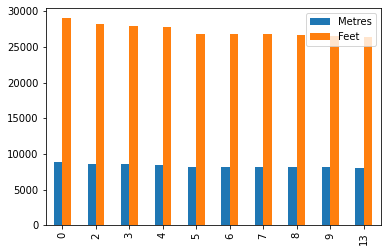

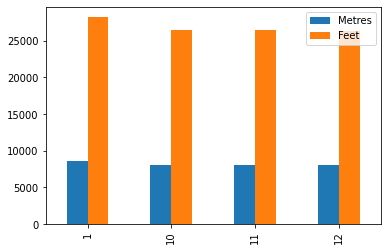

In [8]:
df.groupby('Range').plot(kind ='bar')
##https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb

They are all with in 8k to 9k meter range so bar show alot of differences.  

---



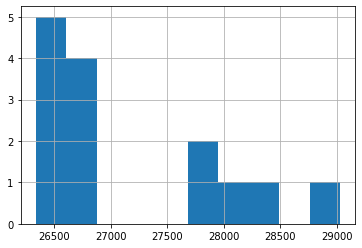

In [9]:
df.Feet.hist()
##https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb

lets do some description in these peaks

---



In [10]:
df.Feet.describe()
##https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb

count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

so we have mean, standard deviation and other 5 discription.

---



lets do mean by groupby range. 

---



In [11]:
df.groupby('Range').mean()

,Metres,Feet
Range,,
Himalayas,8319.80,27295.9
Karakoram,8194.25,26884.0


lets do median by groupby range. 

---



In [12]:
df.groupby('Range').median()

,Metres,Feet
Range,,
Himalayas,8177.5,26829.5
Karakoram,8065.5,26461.5


# BigQuery

In [13]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')
#https://github.com/ashpou1/data-processing-4313/blob/main/SQL%20Essentials.ipynb

Authenticated


we will going to use public data of chicago city taxi trips. 

---



For general view of data i will print out 10 rows. 

---



In [14]:
%%bigquery --project data-viz-338818
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 10
#https://github.com/ashpou1/data-processing-4313/blob/main/SQL%20Essentials.ipynb

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,b8e0c2e280a66fd9ae089df2f4759d6a3b0be246,b2f6b3dd391f77e0791cae7943dae465cf9859b13c86e9...,2014-12-11 17:00:00+00:00,2014-12-11 17:00:00+00:00,0,0.0,None,None,None,None,7.85,1.00,0.0,0.0,8.85,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
1,3e0ba7c63441a7277c4475c05fac1826d5825081,b1de4d4ce24ec1a8e9d0cd77d9aa3f7b340b8297297efd...,2015-02-05 20:30:00+00:00,2015-02-05 20:30:00+00:00,0,0.0,None,None,None,None,6.45,0.00,0.0,0.0,6.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,b27a2815af3491b6004573250c890b55c0e64e77,ae0fb599586f950b7811c99713a56c03504a54c30c6cde...,2015-02-05 18:45:00+00:00,2015-02-05 18:45:00+00:00,0,0.0,None,None,None,None,13.65,2.73,0.0,0.0,16.38,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,0cd7097adfa219daef29c655cc0c76bdbd2028df,07009b8e9b32f36656567f7809b970af38e59dbb58704a...,2015-02-07 03:45:00+00:00,2015-02-07 03:45:00+00:00,0,0.0,None,None,None,None,14.35,0.00,0.0,0.0,14.35,Credit Card,Suburban Dispatch LLC,None,None,None,None,None,None
4,26ee1435374aaefd2d8b21e2048780f315ddeece,b884dd3799982951b7b1293d92a3e6e90ba3483a6fdbf2...,2015-02-03 09:45:00+00:00,2015-02-03 09:45:00+00:00,0,0.0,None,None,None,None,8.25,2.06,0.0,0.0,10.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
5,ee6ff0da50266a82bf524f55241d8924f9bbee1c,bac9df43d5a10e6645f1545702ab061747dffb1f9a62c5...,2014-12-14 16:45:00+00:00,2014-12-14 16:45:00+00:00,0,0.0,None,None,None,None,11.05,1.50,0.0,0.0,12.55,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
6,76d0dae48e91f3c98844d20fcb092779acc33f7b,5c78e836fa4fd7ecadd6d3f7d9224f2af888dedeec3304...,2015-02-05 23:30:00+00:00,2015-02-05 23:30:00+00:00,0,0.0,None,None,None,None,26.45,6.61,0.0,0.0,33.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
7,a1ebb56e2a57ff5474ea0d6ab70d82ec573c6cb9,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,2014-08-30 16:30:00+00:00,2014-08-30 16:30:00+00:00,0,0.0,None,None,None,None,19.05,2.86,0.0,0.0,21.91,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
8,89f141547dd59f4df3f91a94d8c744b550732cff,7ac5d62f7babdf58d4c3d1172abff990cca8253af6ad59...,2015-02-05 18:45:00+00:00,2015-02-05 18:45:00+00:00,0,0.0,None,None,None,None,9.85,1.97,0.0,0.0,11.82,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
9,edfd9215f69bfa4ac83a5ec0c6f852b8e59368e9,4c8b6783201bdc422fd78043aceeea92a005af4c37bba7...,2015-01-31 03:00:00+00:00,2015-01-31 03:15:00+00:00,360,0.0,None,None,None,None,6.45,0.00,0.0,1.0,7.45,Cash,Blue Ribbon Taxi Association Inc.,None,None,None,None,None,None


lets count total rows in data. 

---



In [15]:
%%bigquery --project data-viz-338818
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
#https://github.com/ashpou1/data-processing-4313/blob/main/SQL%20Essentials.ipynb

,total_rows
0,198792903


there are 198792903 rows which is big data. 

---



Now lets do some fun with it. using payment type as group by i will calculate average of total trip. 

---



In [24]:
%%bigquery --project data-viz-338818
SELECT payment_type, AVG(trip_total) as Average_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type
#https://github.com/ashpou1/data-processing-4313/blob/main/SQL%20Essentials.ipynb

,payment_type,Average_trip_total
0,Way2ride,16.639366
1,Split,18.788039
2,Prepaid,22.377662
3,No Charge,15.836177
4,Cash,12.265548
5,Credit Card,20.524892
6,Prcard,20.320682
7,Unknown,17.649893
8,Mobile,20.339910
9,Dispute,15.496588


In average there is highest amount of prepaid total trips. 

---



Lets do average time of the trip in seconds. 

---



In [17]:
%%bigquery --project data-viz-338818
SELECT AVG(trip_seconds) as Average_time_in_seconds
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
#https://github.com/ashpou1/data-processing-4313/blob/main/SQL%20Essentials.ipynb

,Average_time_in_seconds
0,792.717188


In average people do 792.7 second of trips. 

---



lets count the trips which are non zero.

---



In [21]:
%%bigquery --project data-viz-338818

SELECT COUNTIF(trip_seconds>=0) as non_zero_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,non_zero_trips
0,197493118


we got 197493118 total non zero trips. 

---



lets see how many trips are more than average time.

---



In [22]:
%%bigquery --project data-viz-338818
SELECT COUNTIF(trip_seconds>792.7) as trips_longer_than_average_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,trips_longer_than_average_time
0,62143014


We got 62143014 total trips which are longer than average trips.

---



lets count the trips which are non zero and more than average time of th trip. 

---



In [25]:
%%bigquery --project data-viz-338818
SELECT COUNT(*) as non_zero_trips_above_the_average_time_in_seconds
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds >=0 AND trip_seconds >=792.7

,non_zero_trips_above_the_average_time_in_seconds
0,62143014


I got the same answer as is got in  more than averege trip above. 

---



# opinions 
(a) Approximately how long did you work on this exam?

Around 3 or 3 and half hours.

(b) Which was the hardest and easiest topic from this section?

Probably big Query is the hardest one and easiest will be HTML table pull up. 

(c) Which method of gathering data are you most excited to use again?

BigQuery is hard but if i spend some more time on it, i will do BigQuery